In [1]:
import nltk
import math
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("news_summary.csv",encoding='iso-8859-1')
df.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     4514 non-null   object
 1   date       4514 non-null   object
 2   headlines  4514 non-null   object
 3   read_more  4514 non-null   object
 4   text       4514 non-null   object
 5   ctext      4396 non-null   object
dtypes: object(6)
memory usage: 211.7+ KB


In [4]:
df['article'] = df['ctext']
df['summary'] = df['text']

In [5]:
df.drop(['author','date','read_more','text','ctext'],axis=1,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace = True)

In [6]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [7]:
def lemmatize_tokenize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def join_words(lst):
  return ' '.join(lst)

In [8]:
df['article'] = df['article'].apply(lemmatize_tokenize_text)
df['summary'] = df['summary'].apply(lemmatize_tokenize_text)

In [9]:
df['article'] = df['article'].apply(join_words)
df['summary'] = df['summary'].apply(join_words)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      4396 non-null   int64 
 1   headlines  4396 non-null   object
 2   article    4396 non-null   object
 3   summary    4396 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.5+ KB


In [33]:
#Creating word dictionary, where key is the word and value is the row index
#We also remove the stop words before adding them in dictionary and change everyone to lowercase
def to_lower(word):
  return word.lower()
stop_words = nltk.corpus.stopwords.words('english')
def create_dictionary(article):
    arti = article.split()
    final_ = [u for u in arti if u not in stop_words]
    d = {}
    for i in final_:
        if i in d.keys():
            d[i] = d[i] + 1
        else:
            d[i] = 1
    

    return d

In [34]:
#!pip install WordCloud

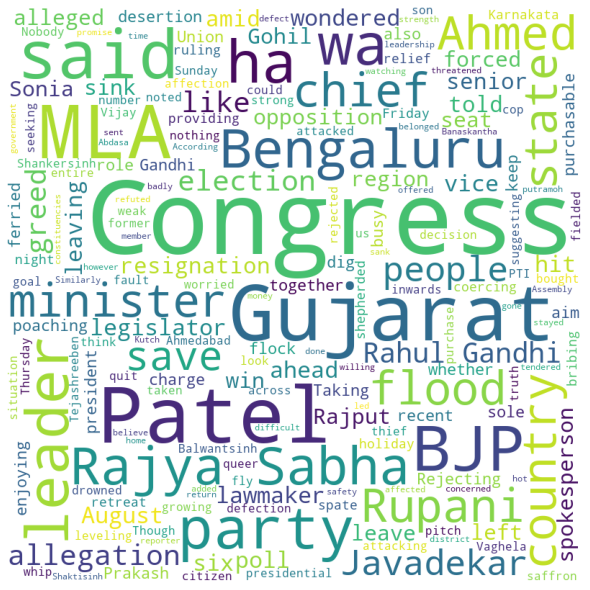

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
min_font_size = 10).generate(df['article'][218])
stopwords_list = nltk.corpus.stopwords.words('english')
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(df['article'][218])
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

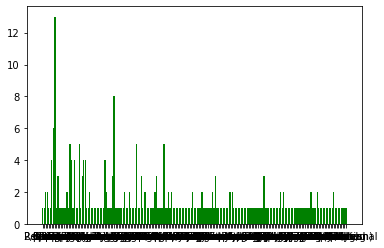

In [43]:
dic = create_dictionary(df['article'][512])
plt.bar(dic.keys(), dic.values(), color='g')
plt.show()

In [48]:
dic2 = {x : dic[x] for x in dic.keys() if dic[x]>2}

In [49]:
dic2

{'printing': 4,
 '2,000-rupee': 6,
 'note': 13,
 'month': 3,
 'new': 5,
 'Rs': 4,
 'people': 4,
 'said': 5,
 'central': 3,
 'bank': 4,
 'also': 4,
 'cash': 4,
 'currency': 3,
 'circulation': 8,
 'billion': 5,
 'trillion': 3,
 'November': 3,
 '500-rupee': 5,
 '200-rupee': 3,
 'supply': 3}

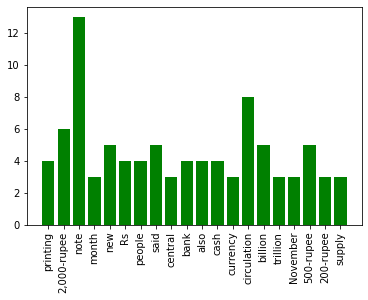

In [50]:
plt.bar(dic2.keys(), dic2.values(), color='g')
plt.xticks(range(len(dic2.keys())), dic2.keys(), rotation='vertical')
plt.show()